In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import scipy
import re

import sys
sys.path.insert(0, r'/Users/Student/OneDrive/MSci project/MSci2022_TESS/packages')
from parameters_reading import read_df_params

In [2]:
df = pd.read_csv("measured_wasp_17b_params.csv")#, header=None)
df = df.set_index('Parameter')

In [3]:
df

,Model A,Model B,Model C
Parameter,,,
T_0,1630.8616428840369+0.00039904889376884967-0.00...,1630.8614018713324+0.00023805651130714978-0.00...,1630.8614881350509+0.00026684631575335516-0.00...
i,88.39568159446347+0.8557190483726771-0.9860796...,87.54069213161702+0.43098898185745327-0.514004...,87.30852050543098+0.39644874320137546-0.446981...
P,3.7353984634338695+0.00012925396875784756-0.00...,3.735484831616331+0.0000006232-0.0000016617,3.735484553218816+0.0000018351-0.0000018212
RpRs,0.1203829698708299+0.00046385548844797564-0.00...,0.12130714805888419+0.000404658423926868-0.000...,0.12217592094892667+0.0005177504782353098-0.00...
a/R*,7.39832492366634+0.20282872618265113-0.1335052...,7.190146553234434+0.12385182418808682-0.128598...,7.115132869990389+0.12153948281163807-0.123589...
colour,blue,sienna,red


In [4]:
df_ref_list = df.columns

# df_e_list = df.loc['e'] #Eccentricty row
df_i_list = df.loc['i'] #Orbtial inclination row
df_P_list = df.loc['P'] #Orbtial period row
# df_R_list = df.loc['R'] #Planetary radius row
# df_a_list = df.loc['a'] #Semi-major axis row
# df_b_list = df.loc['b'] #Impact parameter row
df_RpRs_list = df.loc['RpRs'] #R_p/R_star row
# df_w_list = df.loc['w'] #
df_color = df.loc['colour'] #Colours
# df_T_c_list = df.loc['T_c']
# df_transit_duration_list = df.loc['transit_duration']
df_a_Rs_list = df.loc['a/R*']
# df_sigma_list = df.loc['sigma']
# df_rho_list = df.loc['rho']
df_T_0 = df.loc['T_0']

# e_list, e_ref_list = read_df_params(df_e_list, df_ref_list)
i_list, i_ref_list = read_df_params(df_i_list, df_ref_list)
P_list, P_ref_list = read_df_params(df_P_list, df_ref_list)
# R_list, R_ref_list = read_df_params(df_R_list, df_ref_list)
# a_list, a_ref_list = read_df_params(df_a_list, df_ref_list)
# b_list, b_ref_list = read_df_params(df_b_list, df_ref_list)
RpRs_list, RpRs_ref_list = read_df_params(df_RpRs_list, df_ref_list)
# T_c_list, T_c_ref_list = read_df_params(df_T_c_list, df_ref_list)
# transit_duration_list, transit_duration_ref_list = read_df_params(df_transit_duration_list, df_ref_list)
a_Rs_list, a_Rs_ref_list = read_df_params(df_a_Rs_list, df_ref_list)
# sigma_list, sigma_ref_list = read_df_params(df_sigma_list, df_ref_list)
# rho_list, rho_ref_list = read_df_params(df_rho_list, df_ref_list)
T_0_list, T_0_ref_list = read_df_params(df_T_0, df_ref_list)

In [5]:
# Model A, Model B, Model C
# TESS: Sector 12 (batman),	TESS: Sector 12 + Sector 38 (batman),	TESS: Sector 12 + Sector 38 (batman + gp)

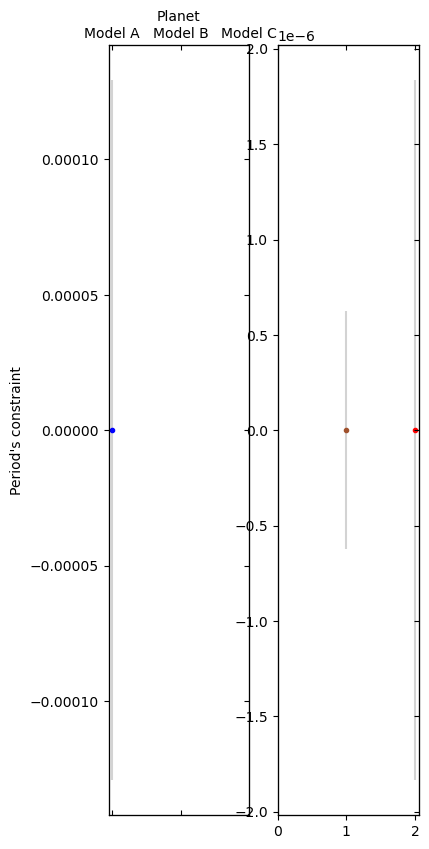

In [6]:
y_list = range(0, len(P_ref_list))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(4,10))

"""
Period
"""


mu, upper, lower = P_list[0]
sigma = max(abs(upper), abs(lower))
colour = df[P_ref_list[0]]['colour']
ax1.errorbar(0, 0, yerr=sigma, fmt=".", color=colour, ecolor="LightGrey", label="author")
# plt.xlim(-0.005, 0.005)

ax1.set_ylabel(r"Period's constraint")

ax1.set_xticklabels([])
ax1.tick_params(axis="x", which="both", direction="in")

# Mirror y
ax1y = ax1.twinx()
ax1y.set_ylim(ax1.get_ylim())
ax1y.get_yaxis().set_ticklabels([])
ax1y.tick_params(which="both", direction="in")

# Mirror x
ax1x = ax1.twiny()
ax1x.set_xlim(ax1.get_xlim())
ax1x.get_xaxis().set_ticklabels([])
ax1x.tick_params(which="both", direction="in")

ax1x.set_xlabel("Planet")


"""
RpRs
"""

for obj, author, y in zip(P_list[1:], P_ref_list[1:], y_list[1:]):
    mu, upper, lower = obj
    sigma = max(abs(upper), abs(lower))
    colour = df[author]['colour']
    ax2.errorbar(y, 0, yerr=sigma, fmt=".", color=colour, ecolor="LightGrey", label="author")
# plt.xlim(-0.005, 0.005)

# ax2.set_ylabel(r"$R_{p}/R_{*}$ constraint")

# ax2.set_xticklabels([])

# Mirror y
ax2y = ax2.twinx()
ax2y.set_ylim(ax2.get_ylim())
ax2y.get_yaxis().set_ticklabels([])
ax2y.tick_params(which="both", direction="in")

# Mirror x
ax2x = ax2.twiny()
ax2x.set_xlim(ax2.get_xlim())
ax2x.get_xaxis().set_ticklabels([])
ax2x.tick_params(which="both", direction="in")



#
ax1.set_xticks(y_list)
ax1x.set_xticks(y_list)
ax2.set_xticks(y_list)
ax2x.set_xticks(y_list)
ax1x.set_xticklabels(df_ref_list)


# ax.legend()
# fig.tight_layout()
plt.subplots_adjust(hspace=0.0)
plt.show()


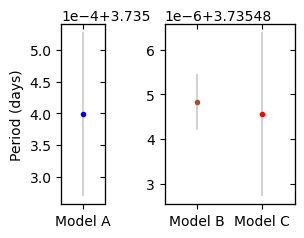

In [7]:
left = 0.1
bottom = 0.1
width = 0.65
height = 0.9
spacing = -1.125

rect1 = [left, bottom, width*0.333, height]
rect2 = [left+(width*0.333)+0.3, bottom, width, height]


fig = plt.figure(figsize=(2, 2))
ax1 = fig.add_axes(rect1)
ax2 = fig.add_axes(rect2)

"""
ax1
"""
mu, upper, lower = P_list[0]
sigma = max(abs(upper), abs(lower))
colour = df[P_ref_list[0]]['colour']
ax1.errorbar(0, mu, yerr=sigma, fmt=".", color=colour, ecolor="LightGrey", label="author")
ax1.set_xlim(-0.5, 0.5)

ax1.set_ylabel("Period (days)")

ax1.set_xticklabels([])
# ax1.tick_params(axis="x", which="both", direction="in")

# Mirror y
ax1y = ax1.twinx()
ax1y.set_ylim(ax1.get_ylim())
ax1y.get_yaxis().set_ticklabels([])
ax1y.tick_params(which="both", direction="in")

# Mirror x
ax1x = ax1.twiny()
ax1x.set_xlim(ax1.get_xlim())
ax1x.get_xaxis().set_ticklabels([])
ax1x.tick_params(which="both", direction="in")




"""
ax2
"""

for obj, author, y in zip(P_list[1:], P_ref_list[1:], y_list[1:]):
    mu, upper, lower = obj
    sigma = max(abs(upper), abs(lower))
    colour = df[author]['colour']
    ax2.errorbar(y, mu, yerr=sigma, fmt=".", color=colour, ecolor="LightGrey", label="author")

ax2.set_xlim(0.5, 2.5)
ax2.set_xticklabels([])
# ax2.tick_params(axis="x", which="both", direction="in")

# Mirror y
ax2y = ax2.twinx()
ax2y.set_ylim(ax2.get_ylim())
ax2y.get_yaxis().set_ticklabels([])
ax2y.tick_params(which="both", direction="in")

# Mirror x
ax2x = ax2.twiny()
ax2x.set_xlim(ax2.get_xlim())
ax2x.get_xaxis().set_ticklabels([])
ax2x.tick_params(which="both", direction="in")


ax1.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))
#
ax1.set_xticks([0])
ax1x.set_xticks([0])
ax1.set_xticklabels(["Model A"])
ax2.set_xticks([1, 2])
ax2x.set_xticks([1, 2])
ax2.set_xticklabels(["Model B", "Model C"])

plt.show()

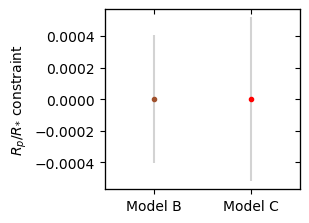

In [8]:
left = 0.1
bottom = 0.1
width = 0.65
height = 0.9
spacing = -1.125

rect1 = [left, bottom, width, height]


fig = plt.figure(figsize=(3, 2))
ax1 = fig.add_axes(rect1)


"""
ax1
"""
for obj, author, y in zip(RpRs_list[1:], RpRs_ref_list[1:], y_list[1:]):
    mu, upper, lower = obj
    sigma = max(abs(upper), abs(lower))
    colour = df[author]['colour']
    ax1.errorbar(y, 0, yerr=sigma, fmt=".", color=colour, ecolor="LightGrey", label="author")

ax1.set_xlim(0.5, 2.5)
ax1.set_ylabel(r"$R_{p}/R_{*}$ constraint")

ax1.set_xticklabels([])
# ax1.tick_params(axis="x", which="both", direction="in")

# Mirror y
ax1y = ax1.twinx()
ax1y.set_ylim(ax1.get_ylim())
ax1y.get_yaxis().set_ticklabels([])
ax1y.tick_params(which="both", direction="in")

# Mirror x
ax1x = ax1.twiny()
ax1x.set_xlim(ax1.get_xlim())
ax1x.get_xaxis().set_ticklabels([])
ax1x.tick_params(which="both", direction="in")

ax1.set_xticks(y_list[1:])
ax1x.set_xticks(y_list[1:])
ax1.set_xticklabels(["Model B", "Model C"])

plt.show()

Model C 3.735484553218816 1.8351e-06 0.15855264
Model B 3.735484831616331 6.232e-07 0.05384448
Model A 3.7353984634338695 0.00012925396875784756 11.16754290067803


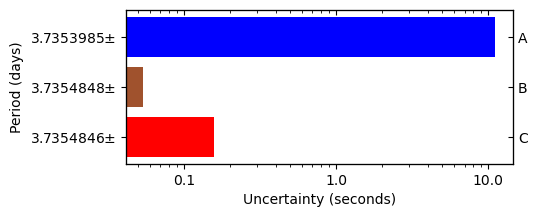

In [9]:
y_list = range(0, len(P_ref_list))
# models_names = ["Model A", "Model B", "Model C"]

fig, ax = plt.subplots(1, figsize=(5,2)) 

labels_with_mu = []
for obj, author, y in zip(P_list[::-1], P_ref_list[::-1], y_list):
    mu, upper, lower = obj
    sigma = max(abs(upper), abs(lower)) * 86400
    print(author, mu, max(abs(upper), abs(lower)), sigma)
    colour = df[author]['colour']
    
    ax.barh(y, sigma, color=colour, align='center')
    label = r"%.7f$\pm$" % (mu)
    labels_with_mu.append(label)

ax.set_ylabel("Period (days)")

ax.set_yticks(y_list, labels=labels_with_mu)
ax.set_xlabel('Uncertainty (seconds)')
# ax.ticklabel_format(axis='x', style='scientific', scilimits=(0,0))
ax.set_xscale('log')
ax.get_xaxis().set_major_formatter(tck.ScalarFormatter())




# Mirror y
axy = ax.twinx()
axy.set_ylim(ax.get_ylim())
axy.get_yaxis().set_ticklabels([])
axy.tick_params(which="both", direction="in")

# Mirror x
axx = ax.twiny()
axx.set_xlim(ax.get_xlim())
axx.tick_params(which="both", direction="in")
axx.set_xscale('log')

axx.get_xaxis().set_ticklabels([])

models_names = ["A", "B", "C"]
axy.set_yticks(y_list, labels=models_names[::-1])
# ax.text(0.015, -1.35, "(days)")

plt.show()

Model C 1630.8614881350509 0.00026684631575335516 23.055521681089886
Model B 1630.8614018713324 0.00023805651130714978 20.56808257693774
Model A 1630.8616428840369 0.00039904889376884967 34.47782442162861


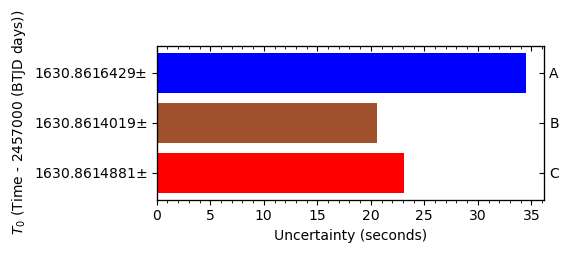

In [10]:
y_list = range(0, len(P_ref_list))
# models_names = ["Model A", "Model B", "Model C"]

fig, ax = plt.subplots(1, figsize=(5,2)) 

labels_with_mu = []
for obj, author, y in zip(T_0_list[::-1], T_0_ref_list[::-1], y_list):
    mu, upper, lower = obj
    sigma = max(abs(upper), abs(lower)) * 86400
    print(author, mu, max(abs(upper), abs(lower)), sigma)
    colour = df[author]['colour']
    
    ax.barh(y, sigma, color=colour, align='center')
    label = r"%.7f$\pm$" % (mu)
    labels_with_mu.append(label)

ax.set_ylabel(r'$T_{0}$ (Time - 2457000 (BTJD days))')
ax.set_yticks(y_list, labels=labels_with_mu)
ax.set_xlabel('Uncertainty (seconds)')
# ax.ticklabel_format(axis='x', style='scientific', scilimits=(0,0))
# ax.set_xscale('log')
# ax.get_xaxis().set_major_formatter(tck.ScalarFormatter())




# Mirror y
axy = ax.twinx()
axy.set_ylim(ax.get_ylim())
axy.get_yaxis().set_ticklabels([])
axy.tick_params(which="both", direction="in")

# Mirror x
axx = ax.twiny()
axx.set_xlim(ax.get_xlim())
axx.tick_params(which="both", direction="in")
# axx.set_xscale('log')

axx.get_xaxis().set_ticklabels([])

models_names = ["A", "B", "C"]
axy.set_yticks(y_list, labels=models_names[::-1])
# ax.text(0.015, -1.35, "(days)")

ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
axx.xaxis.set_minor_locator(tck.AutoMinorLocator())

plt.show()

Model C 87.30852050543098 0.39644874320137546
Model B 87.54069213161702 0.43098898185745327
Model A 88.39568159446347 0.8557190483726771


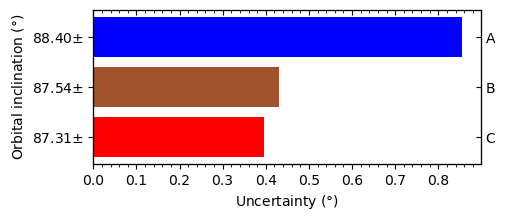

In [11]:
y_list = range(0, len(P_ref_list))
# models_names = ["Model A", "Model B", "Model C"]

fig, ax = plt.subplots(1, figsize=(5,2)) 

labels_with_mu = []
for obj, author, y in zip(i_list[::-1], i_ref_list[::-1], y_list):
    mu, upper, lower = obj
    sigma = max(abs(upper), abs(lower))
    print(author, mu, sigma)
    colour = df[author]['colour']
    
    ax.barh(y, sigma, color=colour, align='center')
    label = r"%.2f$\pm$" % (mu)
    labels_with_mu.append(label)

ax.set_ylabel(r'Orbital inclination ($\degree$)')
ax.set_yticks(y_list, labels=labels_with_mu)
ax.set_xlabel(r"Uncertainty ($\degree$)")
# ax.ticklabel_format(axis='x', style='scientific', scilimits=(0,0))
# ax.set_xscale('log')
# ax.get_xaxis().set_major_formatter(tck.ScalarFormatter())




# Mirror y
axy = ax.twinx()
axy.set_ylim(ax.get_ylim())
axy.get_yaxis().set_ticklabels([])
axy.tick_params(which="both", direction="in")

# Mirror x
axx = ax.twiny()
axx.set_xlim(ax.get_xlim())
axx.tick_params(which="both", direction="in")
# axx.set_xscale('log')

axx.get_xaxis().set_ticklabels([])

models_names = ["A", "B", "C"]
axy.set_yticks(y_list, labels=models_names[::-1])
# ax.text(0.015, -1.35, "(days)")

ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
axx.xaxis.set_minor_locator(tck.AutoMinorLocator())

plt.show()

Model C 0.12217592094892667 0.0005177504782353098
Model B 0.12130714805888419 0.000404658423926868
Model A 0.1203829698708299 0.00046385548844797564


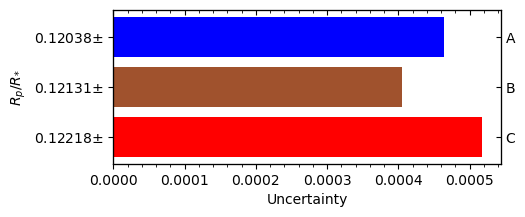

In [12]:
y_list = range(0, len(P_ref_list))
# models_names = ["Model A", "Model B", "Model C"]

fig, ax = plt.subplots(1, figsize=(5,2)) 

labels_with_mu = []
for obj, author, y in zip(RpRs_list[::-1], RpRs_ref_list[::-1], y_list):
    mu, upper, lower = obj
    sigma = max(abs(upper), abs(lower))
    print(author, mu, sigma)
    colour = df[author]['colour']
    
    ax.barh(y, sigma, color=colour, align='center')
    label = r"%.5f$\pm$" % (mu)
    labels_with_mu.append(label)

ax.set_xlabel("Uncertainty")
ax.set_ylabel(r'$R_{p}/R_{*}$')
ax.set_yticks(y_list, labels=labels_with_mu)
# ax.set_xlabel(r"($\degree$)")
# ax.ticklabel_format(axis='x', style='scientific', scilimits=(0,0))
# ax.set_xscale('log')
# ax.get_xaxis().set_major_formatter(tck.ScalarFormatter())




# Mirror y
axy = ax.twinx()
axy.set_ylim(ax.get_ylim())
axy.get_yaxis().set_ticklabels([])
axy.tick_params(which="both", direction="in")

# Mirror x
axx = ax.twiny()
axx.set_xlim(ax.get_xlim())
axx.tick_params(which="both", direction="in")
# axx.set_xscale('log')

axx.get_xaxis().set_ticklabels([])

models_names = ["A", "B", "C"]
axy.set_yticks(y_list, labels=models_names[::-1])
# ax.text(0.015, -1.35, "(days)")

ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
axx.xaxis.set_minor_locator(tck.AutoMinorLocator())

plt.show()

Model C 7.115132869990389 0.12153948281163807
Model B 7.190146553234434 0.12385182418808682
Model A 7.39832492366634 0.20282872618265113


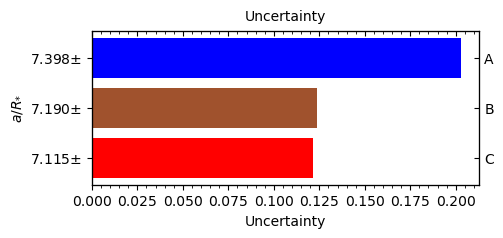

In [13]:
y_list = range(0, len(P_ref_list))
# models_names = ["Model A", "Model B", "Model C"]

fig, ax = plt.subplots(1, figsize=(5,2)) 

labels_with_mu = []
for obj, author, y in zip(a_Rs_list[::-1], a_Rs_ref_list[::-1], y_list):
    mu, upper, lower = obj
    sigma = max(abs(upper), abs(lower))
    print(author, mu, sigma)
    colour = df[author]['colour']
    
    ax.barh(y, sigma, color=colour, align='center')
    label = r"%.3f$\pm$" % (mu)
    labels_with_mu.append(label)

ax.set_xlabel("Uncertainty")
ax.set_ylabel(r'$a/R_{*}$')
ax.set_yticks(y_list, labels=labels_with_mu)
# ax.set_xlabel(r"($\degree$)")
# ax.ticklabel_format(axis='x', style='scientific', scilimits=(0,0))
# ax.set_xscale('log')
# ax.get_xaxis().set_major_formatter(tck.ScalarFormatter())




# Mirror y
axy = ax.twinx()
axy.set_ylim(ax.get_ylim())
axy.get_yaxis().set_ticklabels([])
axy.tick_params(which="both", direction="in")

# Mirror x
axx = ax.twiny()
axx.set_xlim(ax.get_xlim())
axx.tick_params(which="both", direction="in")
# axx.set_xscale('log')

axx.set_xlabel("Uncertainty")
axx.get_xaxis().set_ticklabels([])

models_names = ["A", "B", "C"]
axy.set_yticks(y_list, labels=models_names[::-1])
# ax.text(0.015, -1.35, "(days)")

ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
axx.xaxis.set_minor_locator(tck.AutoMinorLocator())

plt.show()